I want to import the relevant libraries before I begin data analysis.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder



I import the file I want to use using the read_csv function of pandas library.

In [77]:
iris = pd.read_csv("C:\\Users\\BCCL\\Downloads\\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


There are 150 data points which I have to segregate based on 4 columns- 'Sepal length', 'Sepal Width', 'Petal length', 'Petal Width'

In [78]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [82]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [83]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

There are 3 species of flowers I have to segregate data points into. The data set is balanced well between these 3 species.

In [84]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values/rows.

I'll encode Species columnn with numbers and then plot based on 3 factors to see if there are any clear clusters forming. This will help me to gain a rough idea of the difficulty of segregation.

In [87]:
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


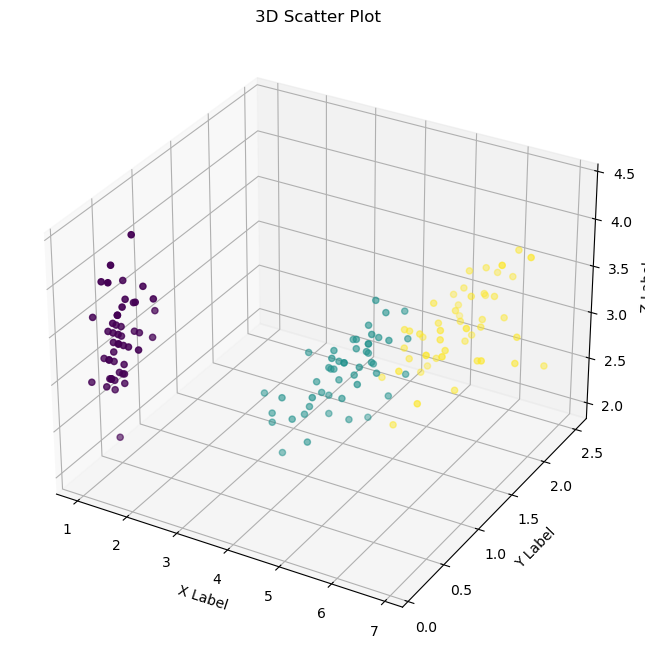

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame with columns x, y, and z
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], iris['SepalWidthCm'], c=iris['Species'], cmap='viridis', marker='o')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

3 clear clusters- should not be a very high tree.

For data segregation, I drop the species label to generate X matrix.  The species column is now the y dataframe. 
I split into training and test data sets for validating all results well.

In [48]:
y = iris["Species"]
X = iris.copy()
X = X.drop("Species", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [49]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

I have trained my model and will now evaluate the results using predictions on test data set X_test.

In [50]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred, average='macro'))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred, average='macro'))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred, average='macro'))


Decision Tree
Accuracy: 0.973684
Precision: 0.966667
Recall: 0.979167
F1 Score: 0.971703


All values are extremely close to 1 indicating very good results.

We will now plot confusion matrix and see how well the classifier works in detail.

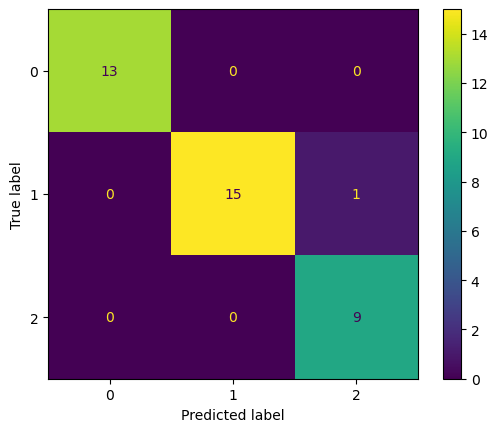

In [53]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()
plt.show()

Only one value categorized wrongly, which is a very good performance for any model.

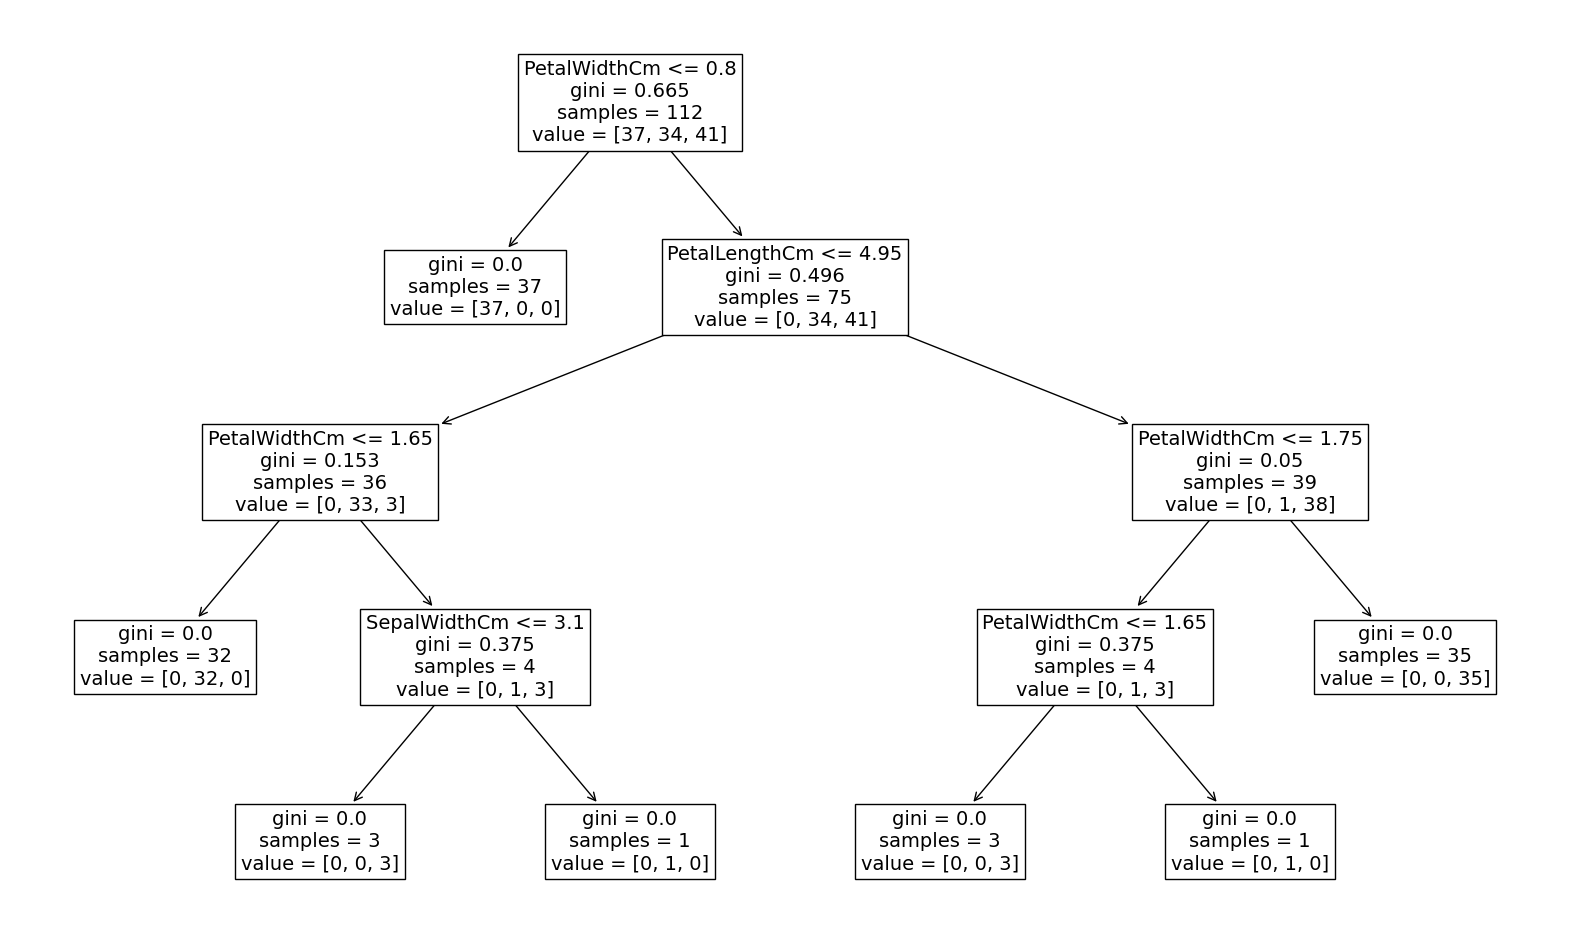

In [54]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=4, fontsize=14, feature_names=list(X.columns));

This is the decision tree seen graphically. Gini values are indicators for quality of separation in a cell.

Now the question arises- which column has largest say in segregating data points. We need to calculate 'feature importance'.

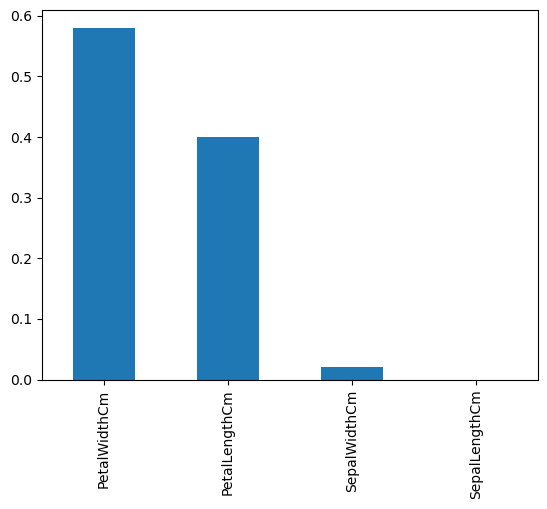

In [55]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

So petal width is the most important feature with around 60% say while petal length has around 40% importance in separation. Sepal related features hardly contribute. 

So we already have a decision tree of height 4 which gives us extremely optimal performance. Let us try hypertuning parameters to check if there are any other values of parameters that can further improve the performance of our decision tree.

In [56]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5, 6, 7]}

scoring =  'f1_macro'

# Perform grid search with cross-validation
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring=scoring, 
                   cv=5, 
                   refit="f1_macro")

# Fit the model
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             refit='f1_macro', scoring='f1_macro')

We check between gini and entropy as parameter for separation, maximum depth is allowed to go up till 7 and scoring is on the basis of f1 score(macro).

In [57]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=0)

A maximum depth of 4 is given which is the same as our decision tree above.

In [59]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9637


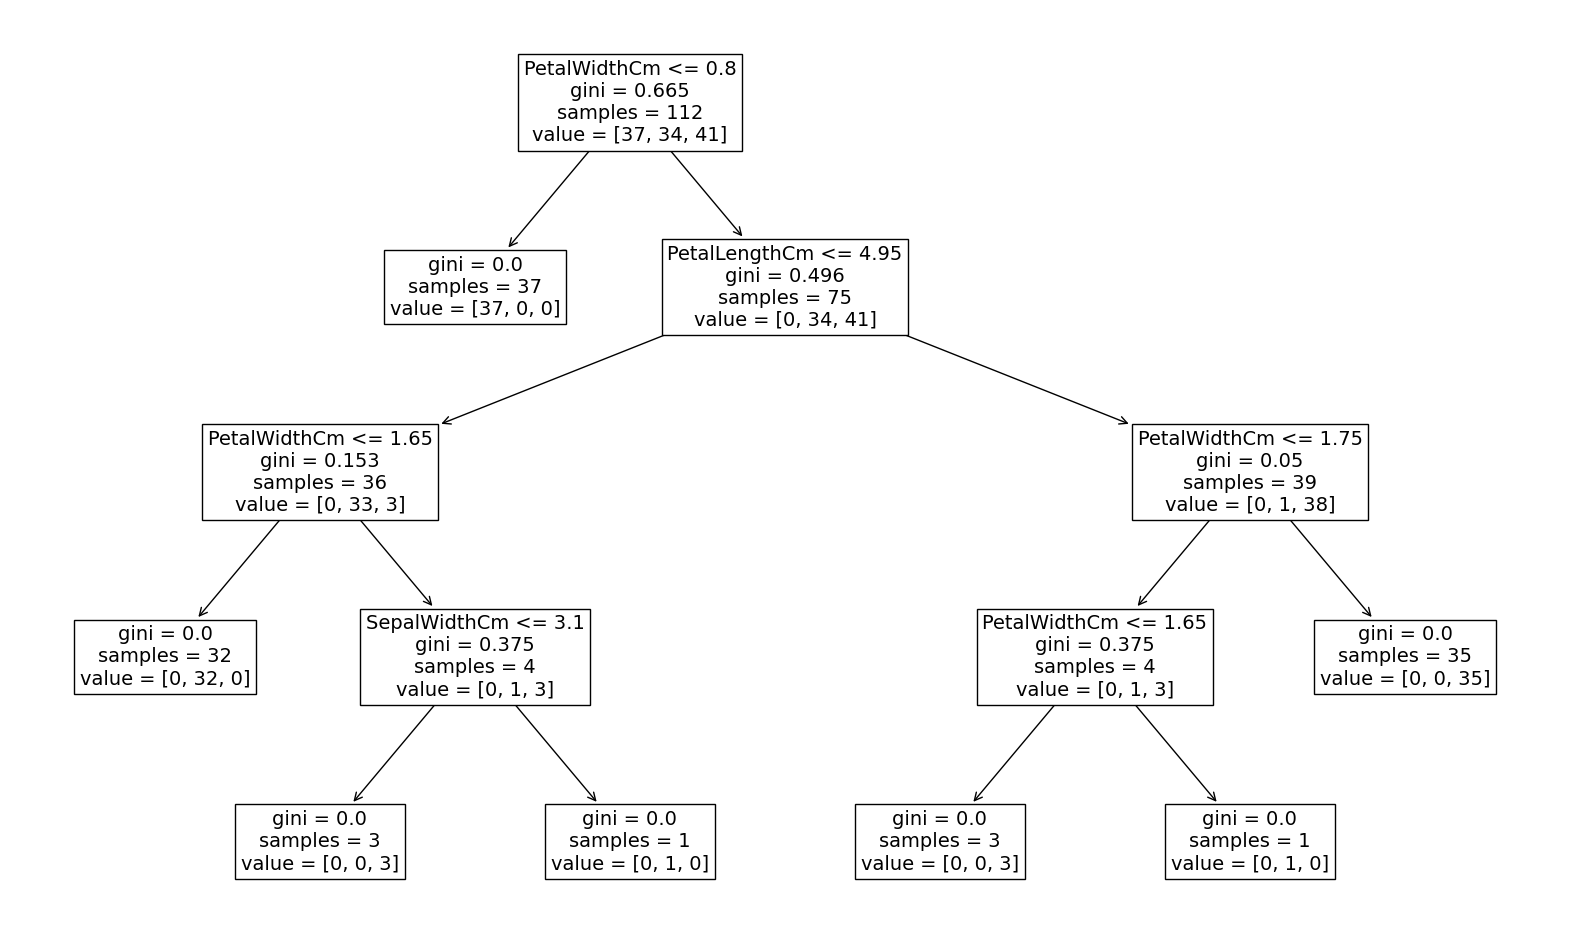

In [60]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=4, fontsize=14, feature_names=list(X.columns));

Tuning parameters give us the same parameters that the software used on its own. The performance of a tree with these parameters is extremely good hence this is the tree I propose as a model